# Time series

A time series is simply a series of data points ordered in time. As continuous monitoring and data collection become more common, the need for competent time series analysis with both statistical and machine learning techniques will increase.

Now, datasets where only one variable is observed at each time is called ‘Univariate Time Series’ and if two or more variables are observed at each time is called ‘Multivariate Time Series’.


In [1]:
# load libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import plotly.express as px
import folium
%matplotlib inline
import pickle



In [2]:
#pip install folium

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

C:\Python38\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Load and combine the data

In [4]:
# combine and create single dataframe
# chicago_df_1 = pd.read_csv('/kaggle/input/crimes-in-chicago/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

<ipython-input-4-d97f4ad4d56d>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
b'Skipping line 533719: expected 23 fields, saw 24\n'
<ipython-input-4-d97f4ad4d56d>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
b'Skipping line 1149094: expected 23 fields, saw 41\n'
<ipython-input-4-d97f4ad4d56d>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chicago_df_4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)


In [5]:
# combining the datasets
df = pd.concat([chicago_df_2,chicago_df_3,chicago_df_4],ignore_index=False,axis=0)

In [6]:
df.shape

(6017767, 23)

Exploring the dataset

In [7]:
# let's view the head of the training dataset
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [8]:
# select only the necessary columns
df = df[['ID','Date','Primary Type','Location Description','Arrest','Domestic','Block','Latitude','Longitude','Location']]

In [9]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Block,Latitude,Longitude,Location
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False,055XX N MANGO AVE,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False,065XX S RHODES AVE,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False,013XX E 69TH ST,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False,061XX W NEWPORT AVE,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False,037XX W 60TH ST,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Block                 object 
 7   Latitude              float64
 8   Longitude             float64
 9   Location              object 
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 424.7+ MB


In [11]:
# change the column date dtype from object to date
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [12]:
# setting the index to be the date 
df.index = pd.DatetimeIndex(df.Date)

In [13]:
# get the summary
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n\n" ,df.columns.tolist())
print ("\nMissing values : \n\n", df.isnull().any())
print ("\nUnique values :  \n\n",df.nunique())

Rows     :  6017767
Columns  :  10

Features : 

 ['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest', 'Domestic', 'Block', 'Latitude', 'Longitude', 'Location']

Missing values : 

 ID                      False
Date                    False
Primary Type            False
Location Description     True
Arrest                  False
Domestic                False
Block                   False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

Unique values :  

 ID                      4336556
Date                    1713547
Primary Type                 34
Location Description        161
Arrest                        2
Domestic                      2
Block                     34291
Latitude                 573527
Longitude                573215
Location                 574013
dtype: int64


In [14]:
# Examine the null records of Location Description
df[df["Location Description"].isnull()]


,ID,Date,Primary Type,Location Description,Arrest,Domestic,Block,Latitude,Longitude,Location
Date,,,,,,,,,,
2006-10-10 06:00:00,5042528,2006-10-10 06:00:00,CRIMINAL DAMAGE,NaN,False,False,005XX W HARRISON ST,41.874382,-87.641537,"(41.874381838, -87.641536792)"
2006-11-02 21:00:00,5097791,2006-11-02 21:00:00,THEFT,NaN,False,False,111XX S ST LOUIS AVE,41.690509,-87.708103,"(41.690508894, -87.708102877)"
2006-12-16 20:00:00,5200215,2006-12-16 20:00:00,CRIMINAL DAMAGE,NaN,False,False,020XX W BARRY AVE,41.937739,-87.679202,"(41.937739134, -87.679201519)"
2006-11-28 21:48:05,5300716,2006-11-28 21:48:05,NARCOTICS,NaN,True,False,059XX W MADISON ST,41.880100,-87.773894,"(41.880100153, -87.773894486)"
2007-04-04 21:38:57,5430400,2007-04-04 21:38:57,CRIMINAL TRESPASS,NaN,True,False,012XX W 14TH ST,41.863409,-87.657459,"(41.86340909, -87.657459319)"
...,...,...,...,...,...,...,...,...,...,...
2017-01-09 16:15:00,10827188,2017-01-09 16:15:00,DECEPTIVE PRACTICE,NaN,False,False,005XX N HALSTED ST,NaN,NaN,NaN
2017-01-10 22:35:00,10827196,2017-01-10 22:35:00,DECEPTIVE PRACTICE,NaN,False,False,045XX N MAGNOLIA AVE,NaN,NaN,NaN
2016-12-28 16:20:00,10827197,2016-12-28 16:20:00,DECEPTIVE PRACTICE,NaN,False,False,023XX W WABANSIA AVE,NaN,NaN,NaN


In [15]:
# drop these records
df = df.dropna()
# print the count of Null records in each column
df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Block                   0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [222]:
df.to_csv("final_data.csv")

# Data Analysis & Visualization

Plot the top 10 primary types

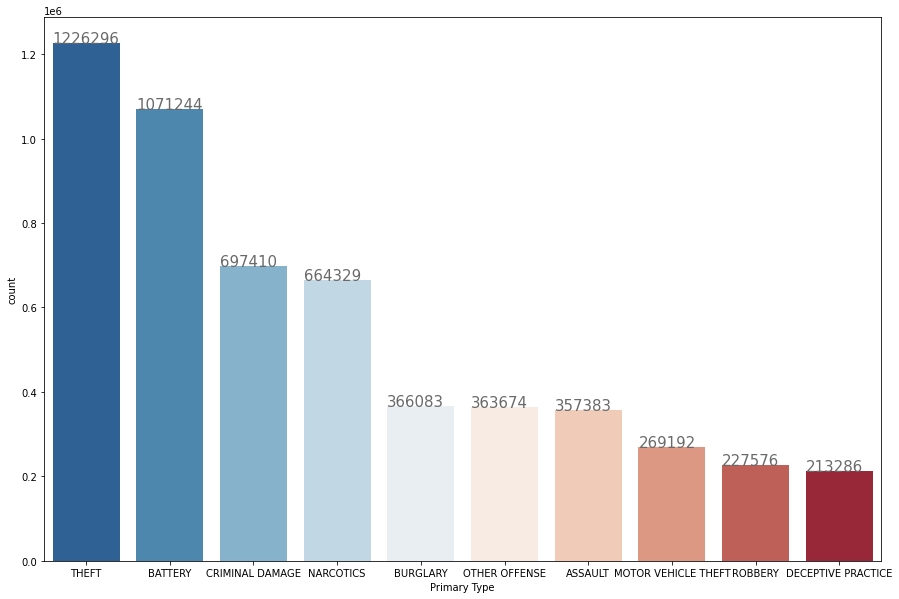

In [16]:
# set figure size
plt.figure(figsize = (15, 10))

# plot the records
ax=sns.countplot(x= 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:10].index, palette = 'RdBu_r')

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(),
            str(i.get_height()), fontsize=15,
color='dimgrey')
show()


### Plot the top 10 Location descriptions

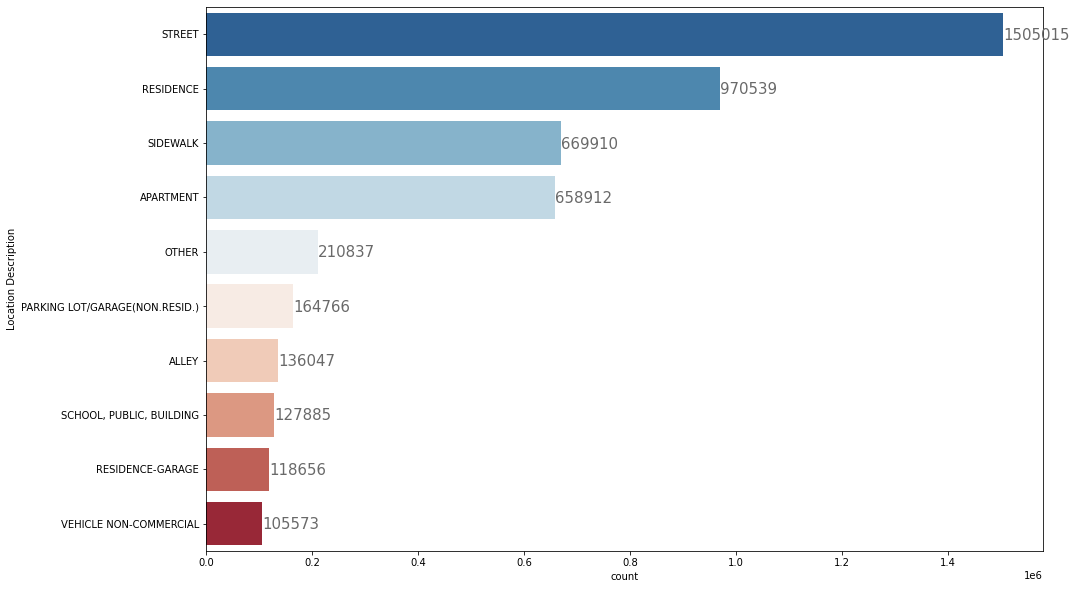

In [17]:
# set the figure size
plt.figure(figsize = (15, 10))

# plot the values
ax = sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:10].index,palette = 'RdBu_r')

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.5, 
            str(i.get_width()), fontsize=15,
color='dimgrey')
show()


### plot the top 10 Blocks

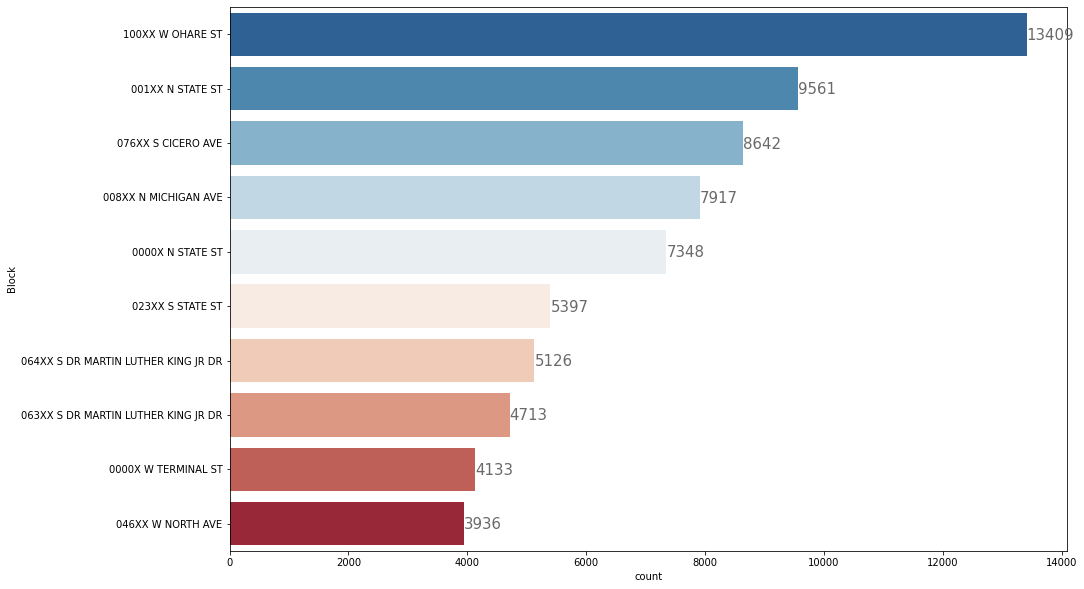

In [18]:
# set the figure size
plt.figure(figsize = (15, 10))

# plot the values
ax = sns.countplot(y= 'Block', data = df, order = df['Block'].value_counts().iloc[:10].index,palette = 'RdBu_r')

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.5, 
            str(i.get_width()), fontsize=15,
color='dimgrey')
show()

Text(0, 0.5, 'Number of Crimes')

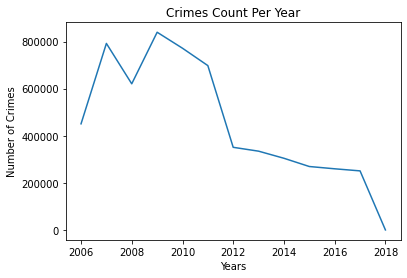

In [19]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

# resample into Years

plt.plot(df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

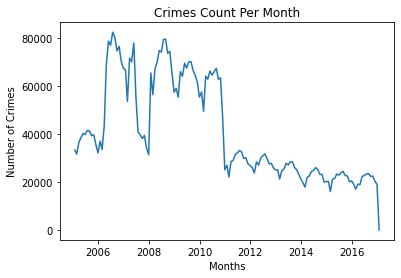

In [20]:
# resample into Months

plt.plot(df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

# Filtering and creating prediction models for the top 10 crime locations

## 1) Street

In [21]:
df_street = df[df['Location Description'] == 'STREET']

In [22]:
df_street.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Block,Latitude,Longitude,Location
Date,,,,,,,,,,
2006-04-05 15:00:00,4673633,2006-04-05 15:00:00,THEFT,STREET,False,False,067XX S ROCKWELL ST,41.770926,-87.688304,"(41.770925978, -87.688304107)"
2006-04-06 11:15:00,4673637,2006-04-06 11:15:00,THEFT,STREET,False,False,0000X N LA SALLE ST,41.882114,-87.632361,"(41.882114362, -87.632361012)"
2006-04-06 11:30:00,4673640,2006-04-06 11:30:00,MOTOR VEHICLE THEFT,STREET,False,False,017XX E 86TH PL,41.737879,-87.581757,"(41.737879171, -87.581756795)"
2006-02-17 21:26:33,4673644,2006-02-17 21:26:33,NARCOTICS,STREET,True,False,052XX S FAIRFIELD AVE,41.798728,-87.692716,"(41.798728387, -87.692716037)"
2006-04-05 08:00:00,4673645,2006-04-05 08:00:00,MOTOR VEHICLE THEFT,STREET,False,False,024XX W HARRISON ST,41.873877,-87.687237,"(41.873876903, -87.687236966)"


In [23]:
df_street.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1505015 entries, 2006-04-05 15:00:00 to 2016-05-03 23:28:00
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1505015 non-null  int64         
 1   Date                  1505015 non-null  datetime64[ns]
 2   Primary Type          1505015 non-null  object        
 3   Location Description  1505015 non-null  object        
 4   Arrest                1505015 non-null  bool          
 5   Domestic              1505015 non-null  bool          
 6   Block                 1505015 non-null  object        
 7   Latitude              1505015 non-null  float64       
 8   Longitude             1505015 non-null  float64       
 9   Location              1505015 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 106.2+ MB


In [24]:
mean_latitude = df_street["Latitude"].mean()
mean_latitude

41.840548218794105

In [25]:
mean_longitude = df_street["Longitude"].mean()
mean_longitude

-87.67288133684394

In [26]:
#plotting only the first 100 locations for speed purposes
mapit_street = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_street.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to( mapit_street )

mapit_street

In [27]:
# aggregating the number of cases per month for all years
ts_df_street = pd.DataFrame(df_street.resample('M').size().reset_index())
ts_df_street.columns = ['Date', 'Crime Count'] # renaming the columns

In [28]:
ts_df_street.head()

,Date,Crime Count
0,2005-01-31,8954
1,2005-02-28,8926
2,2005-03-31,10304
3,2005-04-30,10679
4,2005-05-31,11197


In [29]:
# plot interactive slider chart
fig = px.line(ts_df_street, x='Date',y='Crime Count', title= 'Crime count in Chicago STREETS')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()

In [30]:
ts_df_street = ts_df_street.set_index('Date')

In [31]:
ts_df_street

,Crime Count
Date,
2005-01-31,8954
2005-02-28,8926
2005-03-31,10304
2005-04-30,10679
2005-05-31,11197
...,...
2016-09-30,5523
2016-10-31,5516
2016-11-30,5116


C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

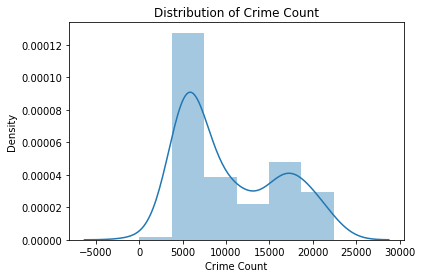

In [32]:
sns.distplot(ts_df_street['Crime Count'])
plt.title('Distribution of Crime Count')

<Figure size 432x288 with 0 Axes>

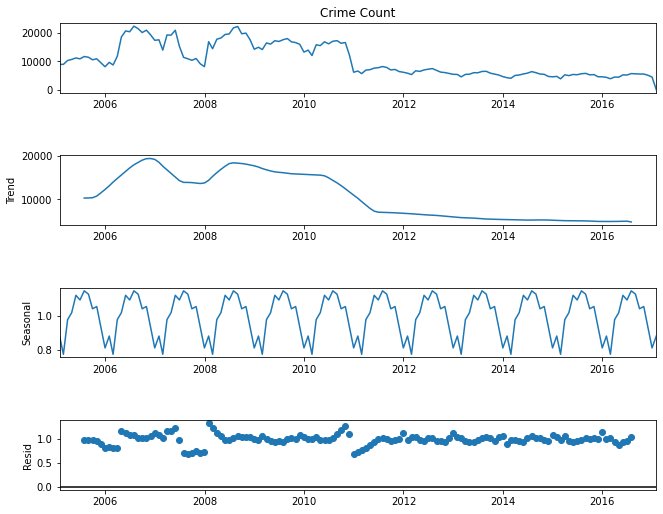

In [33]:
seasonal = seasonal_decompose(ts_df_street['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)

In [34]:
# splitting into train and test set
train_street = ts_df_street[:133]
test_street = ts_df_street[133:]
print(train_street.shape)
print(test_street.shape)

(133, 1)
(12, 1)


In [35]:
train_street.to_csv('train_street.csv')

In [36]:
import pmdarima as pm

In [37]:
model_street = pm.arima.auto_arima(train_street, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)

In [38]:
model_street.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  133
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1154.995
Date:                                 Wed, 20 Apr 2022   AIC                           2319.991
Time:                                         04:16:47   BIC                           2334.405
Sample:                                              0   HQIC                          2325.848
                                                 - 133                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -14.7907     53.100     -0.279      0.781    -118.865      89.284
ar.S.L12       0.8259      0.139      5.953      0.000       0.554       1.098
ma.S.L12      -0.7223      0.153     -4.724      0.000      -1.022      -0.423
ma.S.L24       0.2179      0.124      1.761      0.078      -0.025       0.460
sigma2      2.244e+06   2.06e+05     10.884      0.000    1.84e+06    2.65e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.01   Jarque-Bera (JB):               250.26
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
pickle.dump(model_street, open('model_street.pkl','wb'))

In [40]:
# # create a dataframe with test date index
# prediction = pd.DataFrame(model.predict(n_periods=12),index = test.index,columns =['Predicted Crime Count'])

In [41]:
prediction_street = pd.DataFrame(model_street.predict(n_periods = 12),index=test_street.index)
prediction_street.columns = ['predicted_crime']
prediction_street

,predicted_crime
Date,
2016-02-29,3998.684372
2016-03-31,4620.646252
2016-04-30,4607.533466
2016-05-31,4846.289414
2016-06-30,4917.388070
2016-07-31,5174.219770
2016-08-31,5002.790887
2016-09-30,4627.816112
2016-10-31,4505.121695


In [42]:
test_street

,Crime Count
Date,
2016-02-29,3868
2016-03-31,4460
2016-04-30,4403
2016-05-31,5228
2016-06-30,5170
2016-07-31,5679
2016-08-31,5593
2016-09-30,5523
2016-10-31,5516


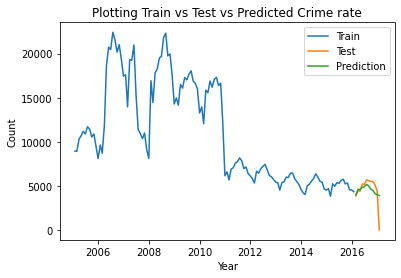

In [43]:
# plot the predictions
plt.plot(train_street, label ='Train')
plt.plot(test_street['Crime Count'], label='Test')
plt.plot(prediction_street, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

In [44]:
# # calculate error
# test['arima_error'] = test['Crime Count'] - prediction['Predicted Crime Count']

# rmse = np.sqrt(np.mean(test.arima_error**2)).round(2)
# mape = np.round(np.mean(np.abs(100*(test.arima_error/test['Crime Count'])), 0))

# print('RMSE = $', rmse)
# print('MAPE =', mape, '%')

## 2) Residence

Preparing the data for the model

In [45]:
df_residence = df[df['Location Description'] == 'RESIDENCE']

In [46]:
df_residence.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Block,Latitude,Longitude,Location
Date,,,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False,055XX N MANGO AVE,41.981913,-87.771996,"(41.981912692, -87.771996382)"
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False,061XX W NEWPORT AVE,41.942984,-87.780057,"(41.942984005, -87.780056951)"
2006-03-31 08:20:00,4673646,2006-03-31 08:20:00,BATTERY,RESIDENCE,False,True,067XX S PERRY AVE,41.771992,-87.628345,"(41.771992493, -87.628344689)"
2006-03-28 22:00:00,4674087,2006-03-28 22:00:00,THEFT,RESIDENCE,False,False,036XX N TRIPP AVE,41.947008,-87.733772,"(41.947007916, -87.733771546)"
2006-04-05 22:30:00,4673655,2006-04-05 22:30:00,ASSAULT,RESIDENCE,False,False,086XX W CATHERINE AVE,41.976854,-87.842409,"(41.976854005, -87.842409045)"


In [47]:
df_residence.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 970539 entries, 2006-04-02 13:00:00 to 2016-05-03 22:15:00
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    970539 non-null  int64         
 1   Date                  970539 non-null  datetime64[ns]
 2   Primary Type          970539 non-null  object        
 3   Location Description  970539 non-null  object        
 4   Arrest                970539 non-null  bool          
 5   Domestic              970539 non-null  bool          
 6   Block                 970539 non-null  object        
 7   Latitude              970539 non-null  float64       
 8   Longitude             970539 non-null  float64       
 9   Location              970539 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 68.5+ MB


In [48]:
mean_latitude = df_residence["Latitude"].mean()
mean_latitude

41.819523891311

In [49]:
mean_longitude = df_residence["Longitude"].mean()
mean_longitude

-87.67144807312587

In [50]:
#plotting only the first 100 locations for speed purposes
mapit_residence = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_residence.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to( mapit_residence )

mapit_residence

In [51]:
# aggregating the number of cases per month for all years
ts_df_residence = pd.DataFrame(df_residence.resample('M').size().reset_index())
ts_df_residence.columns = ['Date', 'Crime Count'] # renaming the columns

In [52]:
ts_df_residence.head()

,Date,Crime Count
0,2005-01-31,6081
1,2005-02-28,5300
2,2005-03-31,6188
3,2005-04-30,6432
4,2005-05-31,6557


In [53]:
# plot interactive slider chart
fig = px.line(ts_df_residence, x='Date',y='Crime Count', title= 'Crime count in Chicago RESIDENCES')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()

In [54]:
ts_df_residence = ts_df_residence.set_index('Date')

In [55]:
ts_df_residence

,Crime Count
Date,
2005-01-31,6081
2005-02-28,5300
2005-03-31,6188
2005-04-30,6432
2005-05-31,6557
...,...
2016-08-31,3931
2016-09-30,3680
2016-10-31,3837


C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

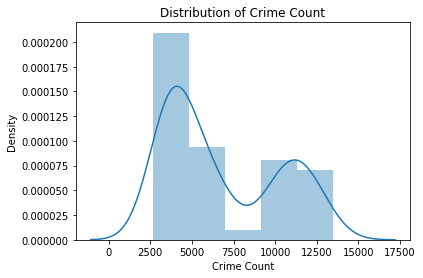

In [56]:
sns.distplot(ts_df_residence['Crime Count'])
plt.title('Distribution of Crime Count')

<Figure size 432x288 with 0 Axes>

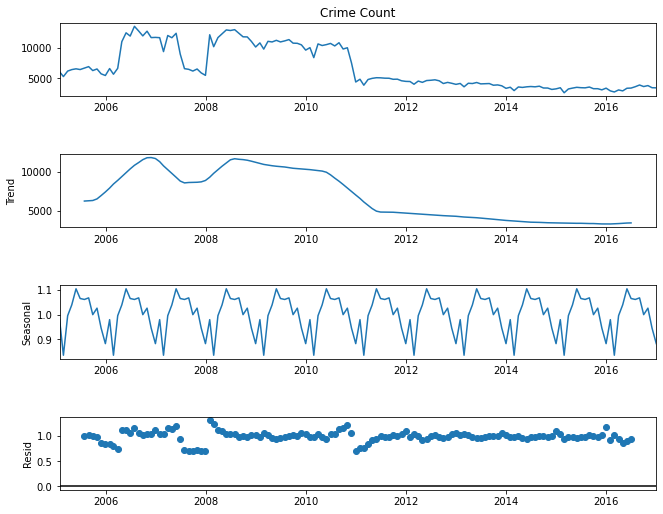

In [57]:
seasonal = seasonal_decompose(ts_df_residence['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)

In [58]:
# splitting into train and test set
train_res = ts_df_residence[:132]
test_res = ts_df_residence[132:]
print(train_res.shape)
print(test_res.shape)

(132, 1)
(12, 1)


In [59]:
train_res.to_csv('train_res.csv')

In [60]:
model_res = pm.arima.auto_arima(train_res, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)

In [61]:
model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1084.031
Date:                                 Wed, 20 Apr 2022   AIC                           2178.063
Time:                                         04:17:05   BIC                           2192.439
Sample:                                              0   HQIC                          2183.904
                                                 - 132                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -5.4004     31.632     -0.171      0.864     -67.398      56.598
ar.S.L12       0.8404      0.154      5.456      0.000       0.539       1.142
ma.S.L12      -0.7620      0.170     -4.475      0.000      -1.096      -0.428
ma.S.L24       0.2050      0.145      1.410      0.159      -0.080       0.490
sigma2      8.805e+05   7.93e+04     11.101      0.000    7.25e+05    1.04e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               883.75
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                             1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
pickle.dump(model_res, open('model_res.pkl','wb'))

In [63]:
prediction_res = pd.DataFrame(model_res.predict(n_periods = 12),index=test_res.index)
prediction_res.columns = ['predicted_crime']
prediction_res

,predicted_crime
Date,
2016-01-31,3487.296047
2016-02-29,3106.622892
2016-03-31,3472.143766
2016-04-30,3425.642161
2016-05-31,3503.963500
2016-06-30,3470.012084
2016-07-31,3453.390055
2016-08-31,3472.183331
2016-09-30,3269.146037


In [64]:
test_res

,Crime Count
Date,
2016-01-31,2976
2016-02-29,2800
2016-03-31,3132
2016-04-30,2975
2016-05-31,3405
2016-06-30,3433
2016-07-31,3657
2016-08-31,3931
2016-09-30,3680


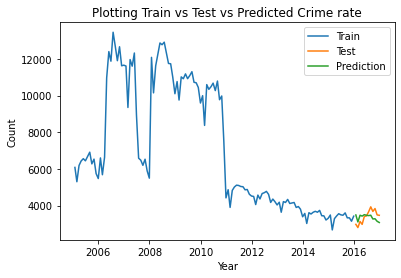

In [65]:
# plot the predictions
plt.plot(train_res, label ='Train')
plt.plot(test_res['Crime Count'], label='Test')
plt.plot(prediction_res, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

In [66]:
# # calculate error
test_res['arima_error'] = test_res['Crime Count'] - prediction_res['predicted_crime']

rmse = np.sqrt(np.mean(test_res.arima_error**2)).round(2)
mape = np.round(np.mean(np.abs(100*(test_res.arima_error/test_res['Crime Count'])), 0))

print('RMSE = $', rmse)
print('MAPE =', mape, '%')

RMSE = $ 375.4
MAPE = 10.0 %


<ipython-input-66-2321c1824768>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 3) Sidewalk

In [67]:
df_sidewalk = df[df['Location Description'] == 'SIDEWALK']

In [68]:
df_sidewalk.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Block,Latitude,Longitude,Location
Date,,,,,,,,,,
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False,065XX S RHODES AVE,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2006-04-03 03:00:00,4673635,2006-04-03 03:00:00,BATTERY,SIDEWALK,False,True,063XX S EBERHART AVE,41.779456,-87.613191,"(41.77945628, -87.613190628)"
2006-02-26 14:47:21,4673642,2006-02-26 14:47:21,NARCOTICS,SIDEWALK,True,False,002XX S LEAMINGTON AVE,41.877845,-87.753461,"(41.87784456, -87.753461293)"
2006-04-03 20:09:00,4673643,2006-04-03 20:09:00,BATTERY,SIDEWALK,False,False,073XX S WOODLAWN AVE,41.761804,-87.595743,"(41.761804069, -87.595743133)"
2006-04-03 22:10:00,4673671,2006-04-03 22:10:00,BATTERY,SIDEWALK,False,False,0000X N PULASKI RD,41.881118,-87.725681,"(41.88111752, -87.725681231)"


In [69]:
df_sidewalk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 669910 entries, 2006-02-26 13:40:48 to 2016-05-03 21:07:00
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    669910 non-null  int64         
 1   Date                  669910 non-null  datetime64[ns]
 2   Primary Type          669910 non-null  object        
 3   Location Description  669910 non-null  object        
 4   Arrest                669910 non-null  bool          
 5   Domestic              669910 non-null  bool          
 6   Block                 669910 non-null  object        
 7   Latitude              669910 non-null  float64       
 8   Longitude             669910 non-null  float64       
 9   Location              669910 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 47.3+ MB


In [70]:
mean_latitude = df_sidewalk["Latitude"].mean()
mean_latitude

41.8422889531671

In [71]:
mean_longitude = df_sidewalk["Longitude"].mean()
mean_longitude

-87.67728509814518

In [72]:
#plotting only the first 100 locations for speed purposes
mapit_sidewalk = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_sidewalk.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to( mapit_sidewalk)

mapit_sidewalk

In [73]:
# aggregating the number of cases per month for all years
ts_df_sidewalk = pd.DataFrame(df_sidewalk.resample('M').size().reset_index())
ts_df_sidewalk.columns = ['Date', 'Crime Count'] # renaming the columns

In [74]:
ts_df_sidewalk.head()

,Date,Crime Count
0,2005-01-31,2916
1,2005-02-28,2865
2,2005-03-31,3420
3,2005-04-30,3931
4,2005-05-31,4122


In [75]:
ts_df_sidewalk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         144 non-null    datetime64[ns]
 1   Crime Count  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [76]:
# plot interactive slider chart
fig = px.line(ts_df_sidewalk, x='Date',y='Crime Count', title= 'Crime count in Chicago SIDEWALKS')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()

In [77]:
ts_df_sidewalk = ts_df_sidewalk.set_index('Date')

In [78]:
ts_df_sidewalk

,Crime Count
Date,
2005-01-31,2916
2005-02-28,2865
2005-03-31,3420
2005-04-30,3931
2005-05-31,4122
...,...
2016-08-31,2310
2016-09-30,2123
2016-10-31,1916


C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

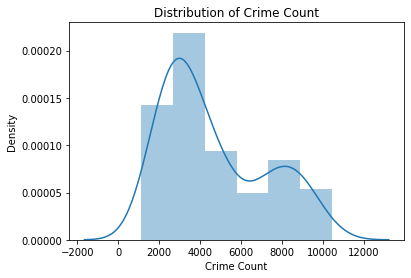

In [79]:
sns.distplot(ts_df_sidewalk['Crime Count'])
plt.title('Distribution of Crime Count')

<Figure size 432x288 with 0 Axes>

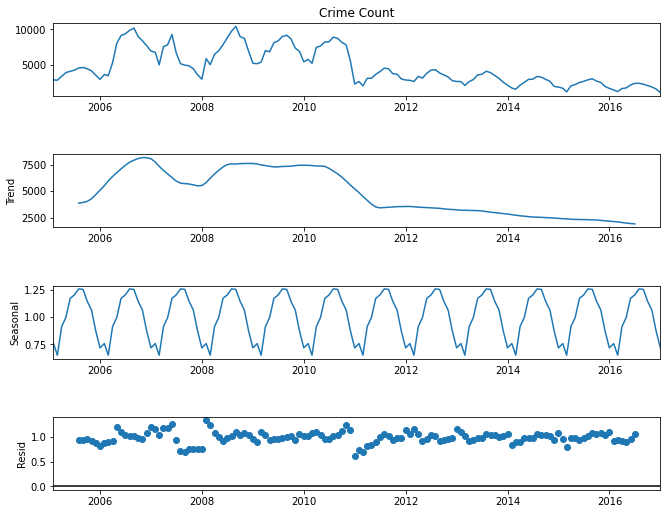

In [80]:
seasonal = seasonal_decompose(ts_df_sidewalk['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)

In [81]:
# splitting into train and test set
train_sidewalk = ts_df_sidewalk[:132]
test_sidewalk = ts_df_sidewalk[132:]
print(train_sidewalk.shape)
print(test_sidewalk.shape)

(132, 1)
(12, 1)


In [82]:
train_sidewalk.to_csv('train_sidewalk.csv')

In [83]:
model_sidewalk = pm.arima.auto_arima(train_sidewalk, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)

In [84]:
model_sidewalk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1042.764
Date:                            Wed, 20 Apr 2022   AIC                           2103.528
Time:                                    04:17:25   BIC                           2129.405
Sample:                                         0   HQIC                          2114.043
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -13.8304     64.433     -0.215      0.830    -140.118     112.457
ar.L1         -0.6966      0.157     -4.425      0.000      -1.005      -0.388
ar.L2         -0.5395      0.160     -3.381      0.001      -0.852      -0.227
ma.L1          0.8867      0.129      6.888      0.000       0.634       1.139
ma.L2          0.7777      0.116      6.725      0.000       0.551       1.004
ar.S.L12       0.8666      0.111      7.774      0.000       0.648       1.085
ma.S.L12      -0.7049      0.149     -4.717      0.000      -0.998      -0.412
ma.S.L24       0.2147      0.115      1.861      0.063      -0.011       0.441
sigma2      4.514e+05   5.03e+04      8.974      0.000    3.53e+05     5.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                41.47
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
pickle.dump(model_sidewalk, open('model_sidewalk.pkl','wb'))

In [86]:
prediction_sidewalk = pd.DataFrame(model_sidewalk.predict(n_periods = 12),index=test_sidewalk.index)
prediction_sidewalk.columns = ['predicted_crime']
prediction_sidewalk

,predicted_crime
Date,
2016-01-31,1536.456979
2016-02-29,1290.079367
2016-03-31,1709.642917
2016-04-30,1888.379062
2016-05-31,2230.784656
2016-06-30,2292.885257
2016-07-31,2520.673628
2016-08-31,2424.874549
2016-09-30,2175.485185


In [87]:
test_sidewalk

,Crime Count
Date,
2016-01-31,1492
2016-02-29,1277
2016-03-31,1699
2016-04-30,1784
2016-05-31,2193
2016-06-30,2423
2016-07-31,2433
2016-08-31,2310
2016-09-30,2123


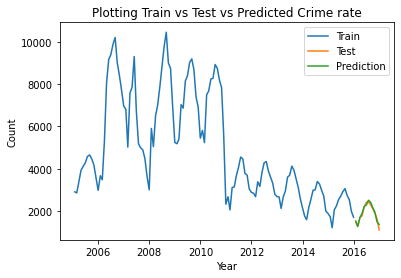

In [88]:
# plot the predictions
plt.plot(train_sidewalk, label ='Train')
plt.plot(test_sidewalk['Crime Count'], label='Test')
plt.plot(prediction_sidewalk, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

In [89]:
# # calculate error
test_sidewalk['arima_error'] = test_sidewalk['Crime Count'] - prediction_sidewalk['predicted_crime']

rmse = np.sqrt(np.mean(test_sidewalk.arima_error**2)).round(2)
mape = np.round(np.mean(np.abs(100*(test_sidewalk.arima_error/test_sidewalk['Crime Count'])), 0))

print('RMSE = ', rmse)
print('MAPE =', mape, '%')

RMSE =  108.52
MAPE = 5.0 %


<ipython-input-89-6350c148a942>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 4) APARTMENT

In [90]:
df_apartment = df[df['Location Description'] == 'APARTMENT']

In [91]:
mean_latitude = df_apartment["Latitude"].mean()
mean_apartment = df_apartment["Longitude"].mean()

In [92]:
#plotting only the first 100 locations for speed purposes
mapit_apartment = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_apartment.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to( mapit_apartment)

In [93]:
mapit_apartment

In [94]:
# aggregating the number of cases per month for all years
ts_df_apartment = pd.DataFrame(df_apartment.resample('M').size().reset_index())
ts_df_apartment.columns = ['Date', 'Crime Count'] # renaming the columns

In [95]:
# plot interactive slider chart
fig = px.line(ts_df_apartment, x='Date',y='Crime Count', title= 'Crime count in Chicago apartments')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()

In [96]:
ts_df_apartment = ts_df_apartment.set_index('Date')

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

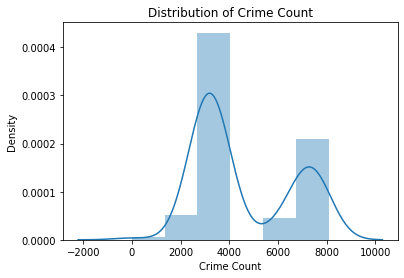

In [97]:
sns.distplot(ts_df_apartment['Crime Count'])
plt.title('Distribution of Crime Count')

<Figure size 432x288 with 0 Axes>

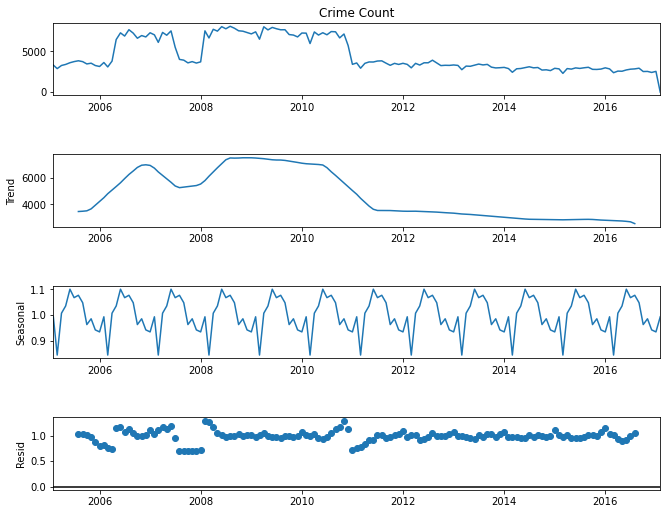

In [98]:
seasonal = seasonal_decompose(ts_df_apartment['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)

In [99]:
ts_df_apartment

,Crime Count
Date,
2005-01-31,3319
2005-02-28,2890
2005-03-31,3274
2005-04-30,3403
2005-05-31,3611
...,...
2016-09-30,2533
2016-10-31,2546
2016-11-30,2420


In [100]:
# splitting into train and test set
train_apartment = ts_df_apartment[:132]
test_apartment = ts_df_apartment[132:]
print(train_apartment.shape)
print(test_apartment.shape)


(132, 1)
(13, 1)


In [101]:
train_apartment.to_csv('train_apartment.csv')

In [102]:
model_apartment = pm.arima.auto_arima(train_apartment, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)

In [103]:
model_apartment.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 12)   Log Likelihood               -1023.049
Date:                              Wed, 20 Apr 2022   AIC                           2064.099
Time:                                      04:17:44   BIC                           2089.975
Sample:                                           0   HQIC                          2074.613
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.2068     91.097      0.178      0.859    -162.340     194.754
ar.L1         -1.7131      0.124    -13.838      0.000      -1.956      -1.470
ar.L2         -0.8870      0.075    -11.796      0.000      -1.034      -0.740
ma.L1          1.8081      0.185      9.791      0.000       1.446       2.170
ma.L2          0.9509      0.158      6.024      0.000       0.641       1.260
ar.S.L12       0.7566      0.357      2.119      0.034       0.057       1.456
ar.S.L24       0.1013      0.151      0.672      0.501      -0.194       0.397
ma.S.L12      -0.6278      0.399     -1.572      0.116      -1.410       0.155
sigma2       3.83e+05   4.24e+04      9.043      0.000       3e+05    4.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               776.47
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
pickle.dump(model_apartment, open('model_apartment.pkl','wb'))

In [105]:
prediction_apartment = pd.DataFrame(model_apartment.predict(n_periods = 13),index=test_apartment.index)
prediction_apartment.columns = ['predicted_crime']
prediction_apartment

,predicted_crime
Date,
2016-01-31,3084.252719
2016-02-29,2659.958038
2016-03-31,3121.929861
2016-04-30,3045.853229
2016-05-31,3200.017791
2016-06-30,3207.472770
2016-07-31,3200.859719
2016-08-31,3235.766753
2016-09-30,2986.668017


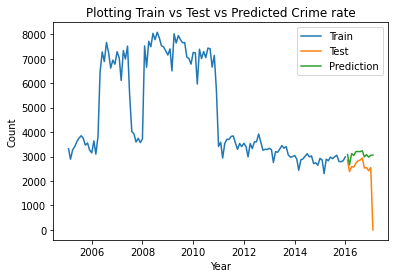

In [106]:
# plot the predictions
plt.plot(train_apartment, label ='Train')
plt.plot(test_apartment['Crime Count'], label='Test')
plt.plot(prediction_apartment, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

In [107]:
# # # calculate error
# test_apartment['arima_error'] = test_apartment['Crime Count'] - prediction_apartment['predicted_crime']

# rmse = np.sqrt(np.mean(test_apartment.arima_error**2)).round(2)
# mape = np.round(np.mean(np.abs(100*(test_apartment.arima_error/test_apartment['Crime Count'])), 0))

# print('RMSE = ', rmse)
# print('MAPE =', mape, '%')

# 5) Others

In [108]:
df_others = df[df['Location Description'] == 'OTHER']

In [109]:
df_others

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Block,Latitude,Longitude,Location
Date,,,,,,,,,,
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False,013XX E 69TH ST,41.769897,-87.593671,"(41.769897392, -87.593670899)"
2006-04-05 22:10:00,4673656,2006-04-05 22:10:00,ROBBERY,OTHER,False,False,006XX E 75TH ST,41.758527,-87.608568,"(41.758526669, -87.608568354)"
2006-04-05 20:48:13,4673717,2006-04-05 20:48:13,BATTERY,OTHER,False,False,042XX W THOMAS ST,41.900755,-87.731912,"(41.9007552, -87.7319123)"
2006-04-04 21:28:00,4673756,2006-04-04 21:28:00,CRIMINAL TRESPASS,OTHER,True,False,026XX S KARLOV AVE,41.843385,-87.726956,"(41.843385232, -87.72695588)"
2006-03-29 13:00:00,4673761,2006-03-29 13:00:00,ROBBERY,OTHER,False,False,002XX W 22ND PL,41.852154,-87.633404,"(41.852153522, -87.633403981)"
...,...,...,...,...,...,...,...,...,...,...
2016-10-13 16:46:00,10715209,2016-10-13 16:46:00,BATTERY,OTHER,True,False,013XX S LAWNDALE AVE,41.863389,-87.717776,"(41.863388717, -87.717776293)"
2016-12-23 08:00:00,10817684,2016-12-23 08:00:00,BURGLARY,OTHER,False,False,021XX N HUMBOLDT BLVD,41.921015,-87.701680,"(41.921015462, -87.701679866)"
2016-10-18 09:30:00,10720474,2016-10-18 09:30:00,MOTOR VEHICLE THEFT,OTHER,True,False,059XX W DIVISION ST,41.902029,-87.773240,"(41.902028979, -87.773240266)"


In [110]:
mean_latitude = df_others["Latitude"].mean()


mean_longitude = df_others["Longitude"].mean()


In [111]:
#plotting only the first 100 locations for speed purposes
mapit_others = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_others.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to( mapit_others)

In [112]:
mapit_others

In [113]:
# aggregating the number of cases per month for all years
ts_df_others = pd.DataFrame(df_others.resample('M').size().reset_index())
ts_df_others.columns = ['Date', 'Crime Count'] # renaming the columns


In [114]:
# plot interactive slider chart
fig = px.line(ts_df_others, x='Date',y='Crime Count', title= 'Crime count in Chicago others')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()


In [115]:
ts_df_others = ts_df_others.set_index('Date')

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

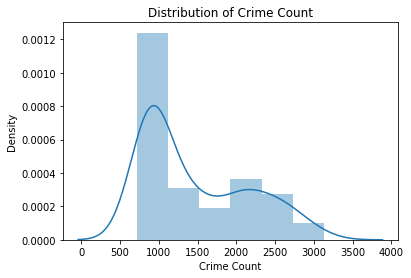

In [116]:
sns.distplot(ts_df_others['Crime Count'])
plt.title('Distribution of Crime Count')

<Figure size 432x288 with 0 Axes>

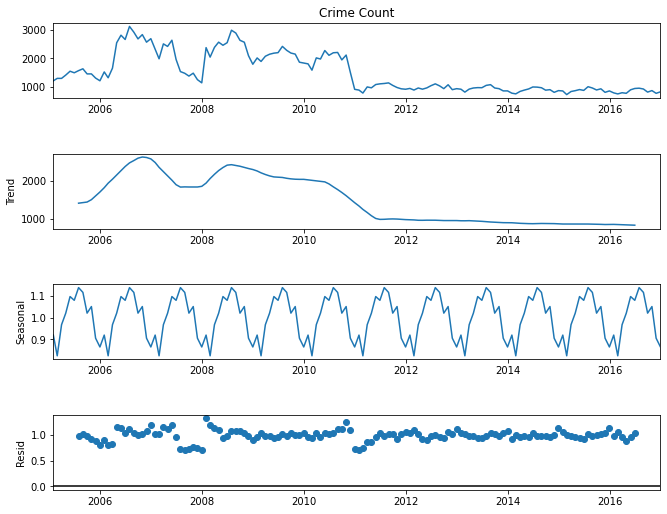

In [117]:
seasonal = seasonal_decompose(ts_df_others['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)


In [118]:
# splitting into train and test set
train_others = ts_df_others[:132]
test_others = ts_df_others[132:]
print(train_others.shape)
print(test_others.shape)

(132, 1)
(12, 1)


In [119]:
train_others.to_csv('train_others.csv')

In [120]:
model_others = pm.arima.auto_arima(train_others, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)

In [121]:
model_others.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 12)   Log Likelihood                -884.769
Date:                              Wed, 20 Apr 2022   AIC                           1787.539
Time:                                      04:18:01   BIC                           1813.415
Sample:                                           0   HQIC                          1798.054
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.7616     24.906     -0.111      0.912     -51.576      46.053
ar.L1         -1.6825      0.070    -24.198      0.000      -1.819      -1.546
ar.L2         -0.8644      0.062    -13.906      0.000      -0.986      -0.743
ma.L1          1.8514      3.507      0.528      0.598      -5.023       8.726
ma.L2          0.9993      3.783      0.264      0.792      -6.415       8.413
ar.S.L12       0.5957      0.281      2.123      0.034       0.046       1.146
ar.S.L24       0.2367      0.109      2.180      0.029       0.024       0.450
ma.S.L12      -0.5615      0.324     -1.731      0.083      -1.197       0.074
sigma2      4.019e+04   1.49e+05      0.269      0.788   -2.52e+05    3.33e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):               239.38
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.12e+14. Standard errors may be unstable.
"""

In [122]:
pickle.dump(model_others, open('model_others.pkl','wb'))

In [123]:
prediction_others = pd.DataFrame(model_others.predict(n_periods = 12),index=test_others.index)
prediction_others.columns = ['predicted_crime']
prediction_others

,predicted_crime
Date,
2016-01-31,830.376073
2016-02-29,770.539040
2016-03-31,865.358025
2016-04-30,857.785072
2016-05-31,910.230481
2016-06-30,908.013554
2016-07-31,945.673264
2016-08-31,930.355892
2016-09-30,857.979814


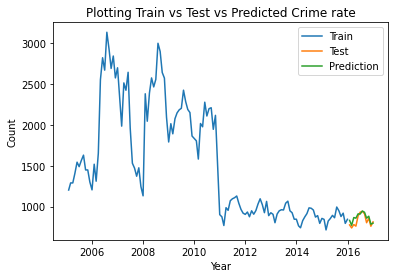

In [124]:
# plot the predictions
plt.plot(train_others, label ='Train')
plt.plot(test_others['Crime Count'], label='Test')
plt.plot(prediction_others, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

In [125]:
# # calculate error
test_others['arima_error'] = test_others['Crime Count'] - prediction_others['predicted_crime']

rmse = np.sqrt(np.mean(test_others.arima_error**2)).round(2)
mape = np.round(np.mean(np.abs(100*(test_others.arima_error/test_others['Crime Count'])), 0))

print('RMSE = ', rmse)
print('MAPE =', mape, '%')

RMSE =  47.62
MAPE = 5.0 %


<ipython-input-125-b27c7454e279>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 6) PARKING LOT/GARAGE(NON.RESID.)

In [126]:
df_parking = df[df['Location Description'] == 'PARKING LOT/GARAGE(NON.RESID.)']

In [127]:
mean_latitude = df_parking["Latitude"].mean()

mean_longitude = df_parking["Longitude"].mean()


In [128]:
#plotting only the first 100 locations for speed purposes
mapit_parking = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_parking.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to(mapit_parking)

In [129]:
mapit_parking

In [130]:
# aggregating the number of cases per month for all years
ts_df_parking = pd.DataFrame(df_parking.resample('M').size().reset_index())
ts_df_parking.columns = ['Date', 'Crime Count'] # renaming the columns

In [131]:
# plot interactive slider chart
fig = px.line(ts_df_parking, x='Date',y='Crime Count', title= 'Crime count in Chicago parking/garages/non resential areas')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()

In [132]:
ts_df_parking = ts_df_parking.set_index('Date')

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

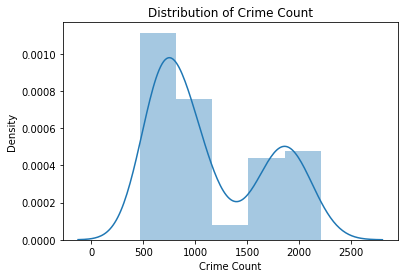

In [133]:
sns.distplot(ts_df_parking['Crime Count'])
plt.title('Distribution of Crime Count')


<Figure size 432x288 with 0 Axes>

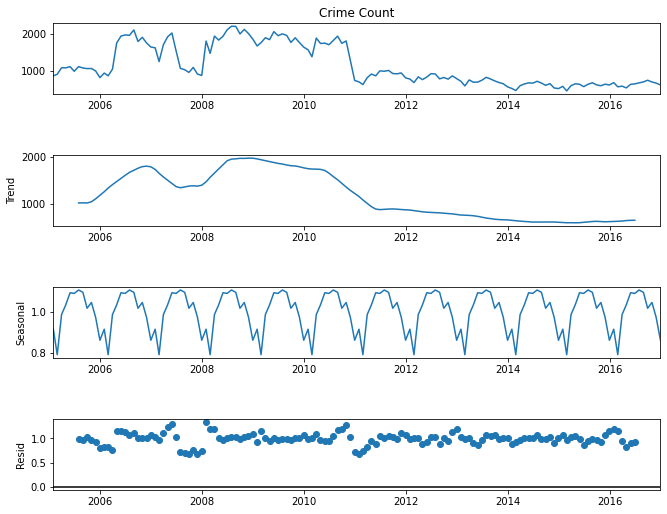

In [134]:
seasonal = seasonal_decompose(ts_df_parking['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)

In [135]:
# splitting into train and test set
train_parking = ts_df_parking[:132]
test_parking = ts_df_parking[132:]
print(train_parking.shape)
print(test_parking.shape)


(132, 1)
(12, 1)


In [136]:
train_parking.to_csv('train_parking.csv')

In [137]:
model_parking = pm.arima.auto_arima(train_parking, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)

In [138]:
model_parking.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -862.940
Date:                              Wed, 20 Apr 2022   AIC                           1733.881
Time:                                      04:18:22   BIC                           1745.381
Sample:                                           0   HQIC                          1738.554
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0321      1.515     -0.021      0.983      -3.001       2.937
ar.S.L12       0.9492      0.141      6.752      0.000       0.674       1.225
ma.S.L12      -0.8148      0.275     -2.961      0.003      -1.354      -0.275
sigma2      2.968e+04   3970.307      7.477      0.000    2.19e+04    3.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               259.43
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
pickle.dump(model_parking, open('model_parking.pkl','wb'))

In [140]:
prediction_parking = pd.DataFrame(model_parking.predict(n_periods = 12),index=test_parking.index)
prediction_parking.columns = ['predicted_crime']
prediction_parking


,predicted_crime
Date,
2016-01-31,642.978795
2016-02-29,566.116345
2016-03-31,710.651766
2016-04-30,729.999111
2016-05-31,756.885564
2016-06-30,748.915884
2016-07-31,768.412949
2016-08-31,761.472238
2016-09-30,702.762299


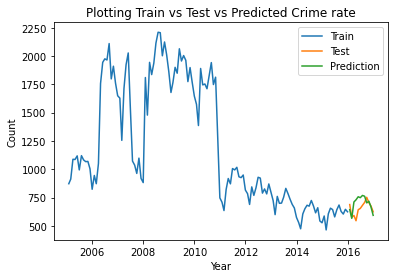

In [141]:
# plot the predictions
plt.plot(train_parking, label ='Train')
plt.plot(test_parking['Crime Count'], label='Test')
plt.plot(prediction_parking, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

In [142]:
# # calculate error
test_parking['arima_error'] = test_parking['Crime Count'] - prediction_parking['predicted_crime']

rmse = np.sqrt(np.mean(test_parking.arima_error**2)).round(2)
mape = np.round(np.mean(np.abs(100*(test_parking.arima_error/test_parking['Crime Count'])), 0))

print('RMSE = ', rmse)
print('MAPE =', mape, '%')

RMSE =  85.07
MAPE = 11.0 %


<ipython-input-142-059c2e656bd4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 7) ALLEYS

In [143]:
df_alley = df[df['Location Description'] == 'ALLEY']

In [144]:
mean_latitude = df_alley["Latitude"].mean()


mean_longitude = df_alley["Longitude"].mean()


In [145]:
#plotting only the first 100 locations for speed purposes
mapit_alley = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_alley.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to(mapit_alley)

In [146]:
mapit_alley

In [147]:
# aggregating the number of cases per month for all years
ts_df_alley = pd.DataFrame(df_alley.resample('M').size().reset_index())
ts_df_alley.columns = ['Date', 'Crime Count'] # renaming the columns


In [148]:
# plot interactive slider chart
fig = px.line(ts_df_alley, x='Date',y='Crime Count', title= 'Crime count in Chicago alleys')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()

In [149]:
ts_df_alley = ts_df_alley.set_index('Date')

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

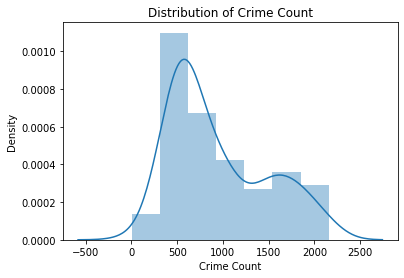

In [150]:
sns.distplot(ts_df_alley['Crime Count'])
plt.title('Distribution of Crime Count')

<Figure size 432x288 with 0 Axes>

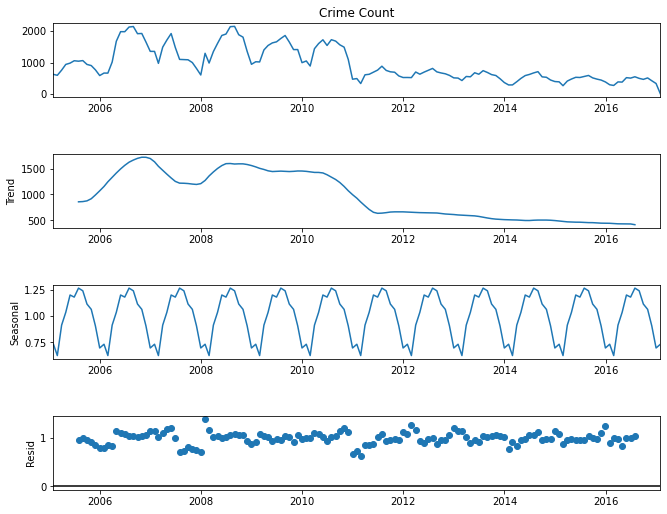

In [151]:
seasonal = seasonal_decompose(ts_df_alley['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)

In [152]:
# splitting into train and test set
train_alley = ts_df_alley[:132]
test_alley = ts_df_alley[132:]
print(train_alley.shape)
print(test_alley.shape)


(132, 1)
(13, 1)


In [153]:
train_alley.to_csv('train_alley.csv')

In [154]:
model_alley = pm.arima.auto_arima(train_alley, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)

In [155]:
model_alley.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -848.161
Date:                            Wed, 20 Apr 2022   AIC                           1706.322
Time:                                    04:18:44   BIC                           1720.698
Sample:                                         0   HQIC                          1712.164
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1262      4.342      0.029      0.977      -8.384       8.636
ma.L1          0.1174      0.064      1.827      0.068      -0.009       0.243
ar.S.L12       0.9058      0.080     11.292      0.000       0.749       1.063
ma.S.L12      -0.5853      0.169     -3.462      0.001      -0.917      -0.254
sigma2      2.327e+04   2464.067      9.443      0.000    1.84e+04    2.81e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                64.59
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
pickle.dump(model_alley, open('model_alley.pkl','wb'))

In [157]:
prediction_alley = pd.DataFrame(model_alley.predict(n_periods = 13),index=test_alley.index)
prediction_alley.columns = ['predicted_crime']
prediction_alley

,predicted_crime
Date,
2016-01-31,376.783063
2016-02-29,315.215047
2016-03-31,441.988016
2016-04-30,488.856849
2016-05-31,552.340048
2016-06-30,553.323961
2016-07-31,600.337255
2016-08-31,600.290088
2016-09-30,525.152237


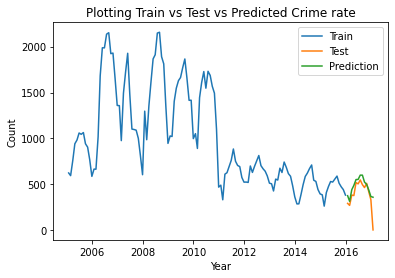

In [158]:
# plot the predictions
plt.plot(train_alley, label ='Train')
plt.plot(test_alley['Crime Count'], label='Test')
plt.plot(prediction_alley, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

In [159]:
# # # calculate error
# test_alley['arima_error'] = test_alley['Crime Count'] - prediction_alley['predicted_crime']

# rmse = np.sqrt(np.mean(test_alley.arima_error**2)).round(2)
# mape = np.round(np.mean(np.abs(100*(test_alley.arima_error/test_alley['Crime Count'])), 0))

# print('RMSE = ', rmse)
# print('MAPE =', mape, '%')

# 8) SCHOOL, PUBLIC, BUILDING

In [160]:
df_school = df[df['Location Description'] == 'SCHOOL, PUBLIC, BUILDING']

In [161]:
mean_latitude = df_school["Latitude"].mean()
mean_longitude = df_school["Longitude"].mean()

In [162]:
#plotting only the first 100 locations for speed purposes
mapit_school = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_school.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to( mapit_school)

In [163]:
mapit_school

In [164]:
# aggregating the number of cases per month for all years
ts_df_school = pd.DataFrame(df_school.resample('M').size().reset_index())
ts_df_school.columns = ['Date', 'Crime Count'] # renaming the columns


In [165]:
# plot interactive slider chart
fig = px.line(ts_df_school, x='Date',y='Crime Count', title= 'Crime count in Chicago schools/ public buildings')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()

In [166]:
ts_df_school = ts_df_school.set_index('Date')

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

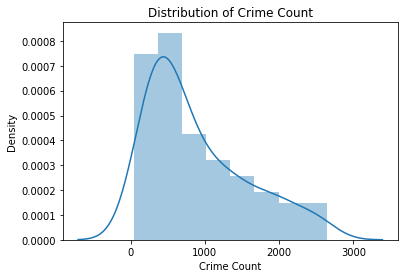

In [167]:
sns.distplot(ts_df_school['Crime Count'])
plt.title('Distribution of Crime Count')

<Figure size 432x288 with 0 Axes>

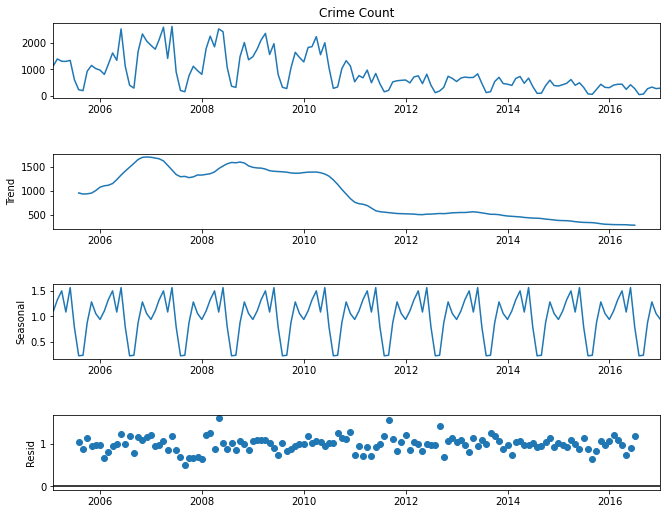

In [168]:
seasonal = seasonal_decompose(ts_df_school['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)


In [169]:
# splitting into train and test set
train_school = ts_df_school[:132]
test_school = ts_df_school[132:]
print(train_school.shape)
print(test_school.shape)


(132, 1)
(12, 1)


In [170]:
train_school.to_csv('train_school.csv')

In [171]:
model_school = pm.arima.auto_arima(train_school, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)


model_school.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -942.223
Date:                            Wed, 20 Apr 2022   AIC                           1896.446
Time:                                    04:19:06   BIC                           1913.697
Sample:                                         0   HQIC                          1903.455
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1540      0.195     -0.791      0.429      -0.535       0.228
ar.L1          0.7136      0.053     13.539      0.000       0.610       0.817
ma.L1         -0.9997      0.662     -1.510      0.131      -2.297       0.298
ar.S.L12       0.9295      0.051     18.361      0.000       0.830       1.029
ma.S.L12      -0.5509      0.131     -4.220      0.000      -0.807      -0.295
sigma2      9.469e+04    6.2e+04      1.528      0.126   -2.68e+04    2.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                73.95
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [172]:
pickle.dump(model_school, open('model_school.pkl','wb'))

In [173]:
prediction_school = pd.DataFrame(model_school.predict(n_periods = 12),index=test_school.index)
prediction_school.columns = ['predicted_crime']
prediction_school

,predicted_crime
Date,
2016-01-31,344.035024
2016-02-29,439.869920
2016-03-31,527.410596
2016-04-30,330.012861
2016-05-31,474.053599
2016-06-30,208.486452
2016-07-31,-39.390105
2016-08-31,-36.893084
2016-09-30,193.075314


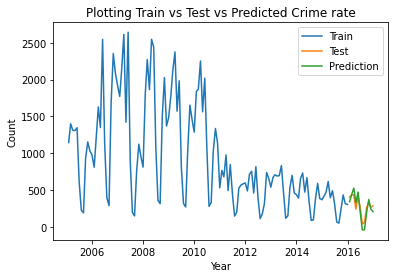

In [174]:
# plot the predictions
plt.plot(train_school, label ='Train')
plt.plot(test_school['Crime Count'], label='Test')
plt.plot(prediction_school, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()


In [175]:
# # calculate error
test_school['arima_error'] = test_school['Crime Count'] - prediction_school['predicted_crime']

rmse = np.sqrt(np.mean(test_school.arima_error**2)).round(2)
mape = np.round(np.mean(np.abs(100*(test_school.arima_error/test_school['Crime Count'])), 0))

print('RMSE = ', rmse)
print('MAPE =', mape, '%')

RMSE =  68.76
MAPE = 45.0 %


<ipython-input-175-7381427ca468>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 9) RESIDENCE-GARAGE

In [176]:
df_residence = df[df['Location Description'] == 'RESIDENCE-GARAGE']

In [177]:
mean_latitude = df_residence["Latitude"].mean()

mean_longitude = df_residence["Longitude"].mean()

In [178]:
#plotting only the first 100 locations for speed purposes
mapit_residence = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_residence.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to(mapit_residence)

In [179]:
mapit_residence

In [180]:
# aggregating the number of cases per month for all years
ts_df_residence = pd.DataFrame(df_residence.resample('M').size().reset_index())
ts_df_residence.columns = ['Date', 'Crime Count'] # renaming the columns

In [181]:
# plot interactive slider chart
fig = px.line(ts_df_residence, x='Date',y='Crime Count', title= 'Crime count in Chicago residence-garages')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()


In [182]:
ts_df_residence = ts_df_residence.set_index('Date')

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

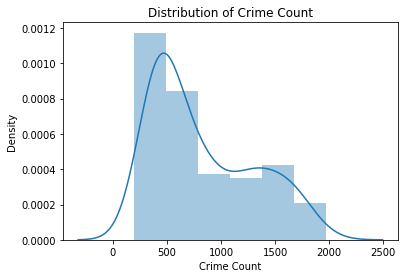

In [183]:
sns.distplot(ts_df_residence['Crime Count'])
plt.title('Distribution of Crime Count')

<Figure size 432x288 with 0 Axes>

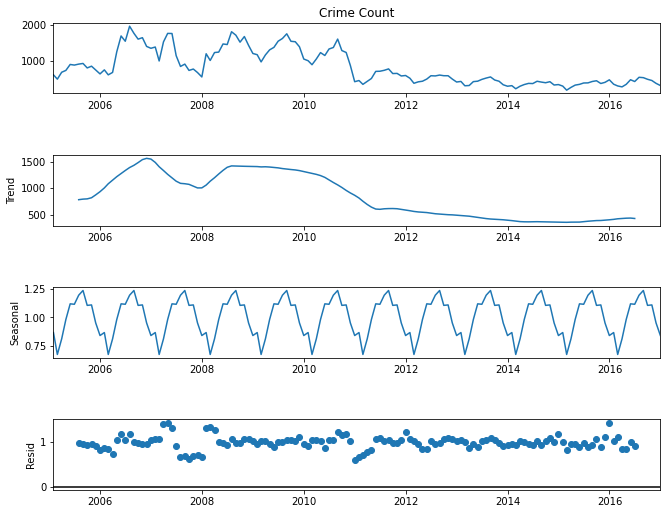

In [184]:
seasonal = seasonal_decompose(ts_df_residence['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)

In [185]:
# splitting into train and test set
train_residence = ts_df_residence[:132]
test_residence = ts_df_residence[132:]
print(train_residence.shape)
print(test_residence.shape)


(132, 1)
(12, 1)


In [186]:
train_residence.to_csv('train_residence.csv')

In [187]:
model_residence = pm.arima.auto_arima(train_residence, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)

In [188]:
model_residence.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -844.743
Date:                              Wed, 20 Apr 2022   AIC                           1705.487
Time:                                      04:19:20   BIC                           1728.488
Sample:                                           0   HQIC                          1714.833
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6188      9.816      0.369      0.712     -15.620      22.858
ar.L1         -0.2318      0.078     -2.973      0.003      -0.385      -0.079
ar.L2         -0.8312      0.078    -10.616      0.000      -0.985      -0.678
ma.L1          0.3009      0.051      5.952      0.000       0.202       0.400
ma.L2          0.9689      0.095     10.163      0.000       0.782       1.156
ar.S.L12       0.8665      0.136      6.365      0.000       0.600       1.133
ma.S.L12      -0.6287      0.217     -2.891      0.004      -1.055      -0.203
sigma2      2.219e+04   2775.866      7.994      0.000    1.67e+04    2.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                66.82
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [189]:
pickle.dump(model_residence, open('model_residence.pkl','wb'))

In [190]:
prediction_residence = pd.DataFrame(model_residence.predict(n_periods = 12),index=test_residence.index)
prediction_residence.columns = ['predicted_crime']
prediction_residence

,predicted_crime
Date,
2016-01-31,508.793409
2016-02-29,462.614278
2016-03-31,490.758747
2016-04-30,528.444539
2016-05-31,581.913835
2016-06-30,613.156178
2016-07-31,616.988404
2016-08-31,639.533707
2016-09-30,635.323306


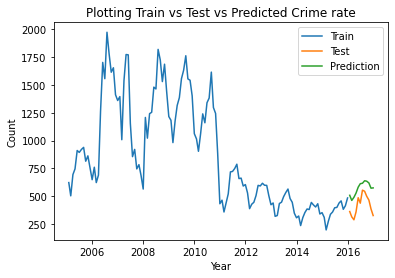

In [191]:
# plot the predictions
plt.plot(train_residence, label ='Train')
plt.plot(test_residence['Crime Count'], label='Test')
plt.plot(prediction_residence, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

In [192]:
# # calculate error
test_residence['arima_error'] = test_residence['Crime Count'] - prediction_residence['predicted_crime']

rmse = np.sqrt(np.mean(test_residence.arima_error**2)).round(2)
mape = np.round(np.mean(np.abs(100*(test_residence.arima_error/test_residence['Crime Count'])), 0))

print('RMSE = ', rmse)
print('MAPE =', mape, '%')

RMSE =  158.93
MAPE = 40.0 %


<ipython-input-192-d9e0de803404>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 10) VEHICLE NON-COMMERCIAL

In [193]:
df_vehicle = df[df['Location Description'] == 'VEHICLE NON-COMMERCIAL']

In [194]:
mean_latitude = df_vehicle["Latitude"].mean()

mean_longitude = df_vehicle["Longitude"].mean()


In [195]:
#plotting only the first 100 locations for speed purposes
mapit_vehicle = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_vehicle.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to(mapit_vehicle)

mapit_vehicle

In [196]:
# aggregating the number of cases per month for all years
ts_df_vehicle = pd.DataFrame(df_vehicle.resample('M').size().reset_index())
ts_df_vehicle.columns = ['Date', 'Crime Count'] # renaming the columns

In [197]:
# plot interactive slider chart
fig = px.line(ts_df_vehicle, x='Date',y='Crime Count', title= 'Crime count in Chicago vehicles')

fig.update_xaxes(
rangeslider_visible =True,
rangeselector=dict(
        buttons=list([
                dict(count=1,label="1y",step="year",stepmode="backward"),
                dict(count=2,label="3y",step="year",stepmode="backward"),
                dict(count=3,label="5y",step="year",stepmode="backward"),
                dict(step="all")
                    ])
                )
                )
fig.show()


In [198]:
ts_df_vehicle = ts_df_vehicle.set_index('Date')

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Crime Count')

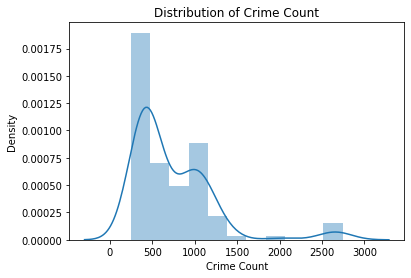

In [199]:
sns.distplot(ts_df_vehicle['Crime Count'])
plt.title('Distribution of Crime Count')


<Figure size 432x288 with 0 Axes>

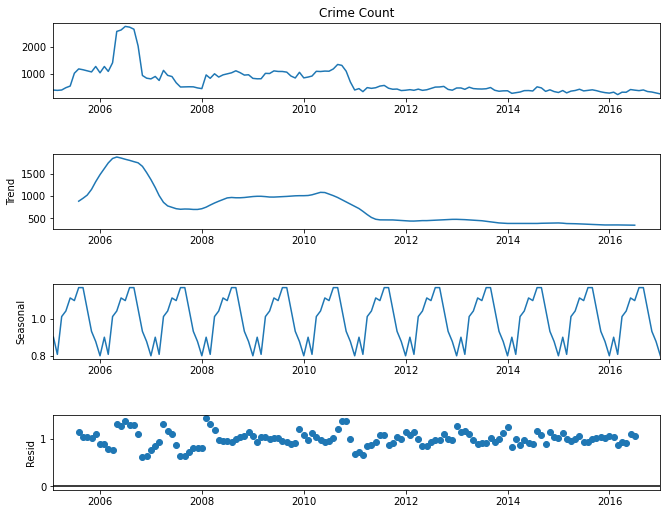

In [200]:
seasonal = seasonal_decompose(ts_df_vehicle['Crime Count'],model='multiplicative')
fig = plt.figure()  
fig = seasonal.plot()  
fig.set_size_inches(10, 8)


In [201]:
# splitting into train and test set
train_vehicle = ts_df_vehicle[:132]
test_vehicle = ts_df_vehicle[132:]
print(train_vehicle.shape)
print(test_vehicle.shape)

(132, 1)
(12, 1)


In [202]:
train_vehicle.to_csv('train_vehicle.csv')

In [203]:
model_vehicle = pm.arima.auto_arima(train_vehicle, seasonal=True, m=12,error_action='ignore',
                             suppress_warnings=True,)

In [204]:
model_vehicle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -865.160
Date:                Wed, 20 Apr 2022   AIC                           1742.320
Time:                        04:19:30   BIC                           1759.571
Sample:                             0   HQIC                          1749.330
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5447      7.547     -0.072      0.942     -15.337      14.247
ar.L1          1.5206      0.076     20.044      0.000       1.372       1.669
ar.L2         -0.8933      0.080    -11.101      0.000      -1.051      -0.736
ma.L1         -1.3493      0.114    -11.811      0.000      -1.573      -1.125
ma.L2          0.7559      0.137      5.537      0.000       0.488       1.024
sigma2      3.177e+04   2074.781     15.312      0.000    2.77e+04    3.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               890.63
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [205]:
pickle.dump(model_vehicle, open('model_vehicle.pkl','wb'))

In [206]:
prediction_vehicle = pd.DataFrame(model_vehicle.predict(n_periods = 12),index=test_vehicle.index)
prediction_vehicle.columns = ['predicted_crime']
prediction_vehicle

,predicted_crime
Date,
2016-01-31,299.497962
2016-02-29,305.879959
2016-03-31,314.594957
2016-04-30,321.601580
2016-05-31,323.926458
2016-06-30,320.658259
2016-07-31,313.067188
2016-08-31,303.898781
2016-09-30,296.193307


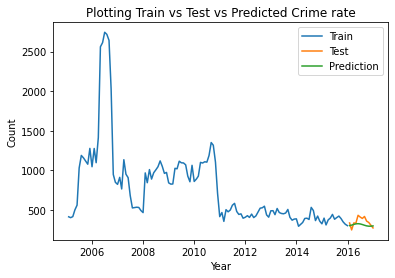

In [207]:
# plot the predictions
plt.plot(train_vehicle, label ='Train')
plt.plot(test_vehicle['Crime Count'], label='Test')
plt.plot(prediction_vehicle, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Plotting Train vs Test vs Predicted Crime rate')
plt.legend()
plt.show()

In [208]:
# # calculate error
test_vehicle['arima_error'] = test_vehicle['Crime Count'] - prediction_vehicle['predicted_crime']

rmse = np.sqrt(np.mean(test_vehicle.arima_error**2)).round(2)
mape = np.round(np.mean(np.abs(100*(test_vehicle.arima_error/test_vehicle['Crime Count'])), 0))

print('RMSE = ', rmse)
print('MAPE =', mape, '%')

RMSE =  63.97
MAPE = 15.0 %


<ipython-input-208-ed59a96d9244>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Prediction Demonstration

## 1) Street

locations in which crimes have occured on the streets in chicago- showing first 100 records:


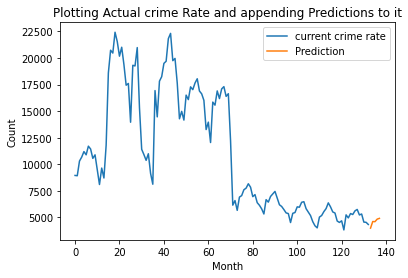

In [226]:
#For live prediction of STREET crimes
from IPython.display import display
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import folium
np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
model_s = pickle.load(open("model_street.pkl", "rb"))
final_data = pd.read_csv('final_data.csv')
df_s = final_data[final_data['Location Description'] == 'STREET']
mean_latitude = df_s["Latitude"].mean()
mean_longitude = df_s["Longitude"].mean()

#plotting only the first 100 locations for speed purposes
mapit_s = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_s.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to(mapit_s)

# mapit_street
p = model_s.predict(n_periods = np)
lst = []
train_s= pd.read_csv('train_street.csv')
for i in range(len(train_s['Crime Count'].tolist())):
         lst.append(i)
crime_list = pd.DataFrame(
    {'month': lst,
     'crime': train_s['Crime Count'].tolist(),
    })
crime_list = crime_list.set_index('month')
plst = []
for i in range(len(p)):
         plst.append(len(lst)+i)
pred_list = pd.DataFrame(
    {'month': plst,
     'crime': p,
    })  
pred_list = pred_list.set_index('month')
print("locations in which crimes have occured on the streets in chicago- showing first 100 records:")
display(mapit_s)
plt.plot(crime_list, label ='current crime rate')
plt.plot(pred_list, label='Prediction')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Plotting Actual crime Rate and appending Predictions to it')
plt.legend()
plt.show()

## 2) Residence

locations in which crimes have occured on the streets in chicago- showing first 100 records:


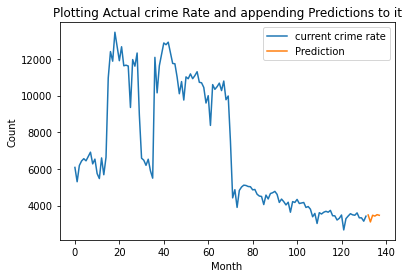

In [227]:
#For live prediction of RESIDENCE crimes
from IPython.display import display
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import folium
np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
model_r = pickle.load(open("model_res.pkl", "rb"))
final_data = pd.read_csv('final_data.csv')
df_r = final_data[final_data['Location Description'] == 'RESIDENCE']
mean_latitude = df_r["Latitude"].mean()
mean_longitude = df_r["Longitude"].mean()

#plotting only the first 100 locations for speed purposes
mapit_r = folium.Map( location=[mean_latitude, mean_longitude], zoom_start=6 )
for index, row in df_r.iloc[:100].iterrows():
    folium.Marker( location=[ row["Latitude"], row["Longitude"] ], fill_color='#43d9de', radius=8 ).add_to(mapit_r)

p = model_r.predict(n_periods = np)
train_r= pd.read_csv('train_res.csv')
lst = []
for i in range(len(train_r['Crime Count'].tolist())):
         lst.append(i)
crime_list = pd.DataFrame(
    {'month': lst,
     'crime': train_r['Crime Count'].tolist(),
    })
crime_list = crime_list.set_index('month')
plst = []
for i in range(len(p)):
         plst.append(len(lst)+i)
pred_list = pd.DataFrame(
    {'month': plst,
     'crime': p,
    })  
pred_list = pred_list.set_index('month')
print("locations in which crimes have occured on the residences in chicago- showing first 100 records:")
display(mapit_r)
plt.plot(crime_list, label ='current crime rate')
plt.plot(pred_list, label='Prediction')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Plotting Actual crime Rate and appending Predictions to it')
plt.legend()
plt.show()

## 3) Sidewalk

In [211]:
# # For live prediction of SIDEWALK crimes
# from IPython.display import display
# np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
# p = model_sidewalk.predict(n_periods = np)
# lst = []
# for i in range(len(train_sidewalk['Crime Count'].tolist())):
#          lst.append(i)
# crime_list = pd.DataFrame(
#     {'month': lst,
#      'crime': train_sidewalk['Crime Count'].tolist(),
#     })
# crime_list = crime_list.set_index('month')
# plst = []
# for i in range(len(p)):
#          plst.append(len(lst)+i)
# pred_list = pd.DataFrame(
#     {'month': plst,
#      'crime': p,
#     })  
# pred_list = pred_list.set_index('month')
# print("locations in which crimes have occured on the streets in chicago- showing first 100 records:")
# display(mapit_sidewalk)
# plt.plot(crime_list, label ='current crime rate')
# plt.plot(pred_list, label='Prediction')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.title('Plotting Actual crime Rate and appending Predictions to it')
# plt.legend()
# plt.show()

# 4) APARTMENT

In [212]:
# # For live prediction of Apartment crimes
# from IPython.display import display
# np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
# p = model_apartment.predict(n_periods = np)
# lst = []
# for i in range(len(train_apartment['Crime Count'].tolist())):
#          lst.append(i)
# crime_list = pd.DataFrame(
#     {'month': lst,
#      'crime': train_apartment['Crime Count'].tolist(),
#     })
# crime_list = crime_list.set_index('month')
# plst = []
# for i in range(len(p)):
#          plst.append(len(lst)+i)
# pred_list = pd.DataFrame(
#     {'month': plst,
#      'crime': p,
#     })  
# pred_list = pred_list.set_index('month')
# print("locations in which crimes have occured on the apartments in chicago- showing first 100 records:")
# display(mapit_apartment)
# plt.plot(crime_list, label ='current crime rate')
# plt.plot(pred_list, label='Prediction')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.title('Plotting Actual crime Rate and appending Predictions to it')
# plt.legend()
# plt.show()

# 5) OTHERS

In [213]:
# # For live prediction of crimes in other areas
# from IPython.display import display
# np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
# p = model_others.predict(n_periods = np)
# lst = []
# for i in range(len(train_others['Crime Count'].tolist())):
#          lst.append(i)
# crime_list = pd.DataFrame(
#     {'month': lst,
#      'crime': train_others['Crime Count'].tolist(),
#     })
# crime_list = crime_list.set_index('month')
# plst = []
# for i in range(len(p)):
#          plst.append(len(lst)+i)
# pred_list = pd.DataFrame(
#     {'month': plst,
#      'crime': p,
#     })  
# pred_list = pred_list.set_index('month')
# print("locations in which crimes have occured in other locations in chicago- showing first 100 records:")
# display(mapit_others)
# plt.plot(crime_list, label ='current crime rate')
# plt.plot(pred_list, label='Prediction')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.title('Plotting Actual crime Rate and appending Predictions to it')
# plt.legend()
# plt.show()

# 6) PARKING LOT/GARAGE(NON.RESID.)

In [214]:
# # For live prediction of Parking Lot crimes
# from IPython.display import display
# np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
# p = model_parking.predict(n_periods = np)
# lst = []
# for i in range(len(train_parking['Crime Count'].tolist())):
#          lst.append(i)
# crime_list = pd.DataFrame(
#     {'month': lst,
#      'crime': train_parking['Crime Count'].tolist(),
#     })
# crime_list = crime_list.set_index('month')
# plst = []
# for i in range(len(p)):
#          plst.append(len(lst)+i)
# pred_list = pd.DataFrame(
#     {'month': plst,
#      'crime': p,
#     })  
# pred_list = pred_list.set_index('month')
# print("locations in which crimes have occured in parking lots/garages in chicago- showing first 100 records:")
# display(mapit_parking)
# plt.plot(crime_list, label ='current crime rate')
# plt.plot(pred_list, label='Prediction')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.title('Plotting Actual crime Rate and appending Predictions to it')
# plt.legend()
# plt.show()

# 7) ALLEYS

In [215]:
# # For live prediction of crimes in alleys
# from IPython.display import display
# np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
# p = model_alley.predict(n_periods = np)
# lst = []
# for i in range(len(train_alley['Crime Count'].tolist())):
#          lst.append(i)
# crime_list = pd.DataFrame(
#     {'month': lst,
#      'crime': train_alley['Crime Count'].tolist(),
#     })
# crime_list = crime_list.set_index('month')
# plst = []
# for i in range(len(p)):
#          plst.append(len(lst)+i)
# pred_list = pd.DataFrame(
#     {'month': plst,
#      'crime': p,
#     })  
# pred_list = pred_list.set_index('month')
# print("locations in which crimes have occured in alleys in chicago- showing first 100 records:")
# display(mapit_alley)
# plt.plot(crime_list, label ='current crime rate')
# plt.plot(pred_list, label='Prediction')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.title('Plotting Actual crime Rate and appending Predictions to it')
# plt.legend()
# plt.show()

# 8) SCHOOL, PUBLIC, BUILDING

In [216]:
# # For live prediction of crimes in schools and public buildings
# from IPython.display import display
# np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
# p = model_school.predict(n_periods = np)
# lst = []
# for i in range(len(train_school['Crime Count'].tolist())):
#          lst.append(i)
# crime_list = pd.DataFrame(
#     {'month': lst,
#      'crime': train_school['Crime Count'].tolist(),
#     })
# crime_list = crime_list.set_index('month')
# plst = []
# for i in range(len(p)):
#          plst.append(len(lst)+i)
# pred_list = pd.DataFrame(
#     {'month': plst,
#      'crime': p,
#     })  
# pred_list = pred_list.set_index('month')
# print("locations in which crimes have occured in schools and public buildings in chicago- showing first 100 records:")
# display(mapit_school)
# plt.plot(crime_list, label ='current crime rate')
# plt.plot(pred_list, label='Prediction')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.title('Plotting Actual crime Rate and appending Predictions to it')
# plt.legend()
# plt.show()

# 9) RESIDENCE-GARAGE

In [217]:
# # For live prediction of crimes in residence garages
# from IPython.display import display
# np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
# p = model_residence.predict(n_periods = np)
# lst = []
# for i in range(len(train_residence['Crime Count'].tolist())):
#          lst.append(i)
# crime_list = pd.DataFrame(
#     {'month': lst,
#      'crime': train_residence['Crime Count'].tolist(),
#     })
# crime_list = crime_list.set_index('month')
# plst = []
# for i in range(len(p)):
#          plst.append(len(lst)+i)
# pred_list = pd.DataFrame(
#     {'month': plst,
#      'crime': p,
#     })  
# pred_list = pred_list.set_index('month')
# print("locations in which crimes have occured in residence garages - showing first 100 records:")
# display(mapit_residence)
# plt.plot(crime_list, label ='current crime rate')
# plt.plot(pred_list, label='Prediction')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.title('Plotting Actual crime Rate and appending Predictions to it')
# plt.legend()
# plt.show()

# 10) VEHICLE NON-COMMERCIAL

In [218]:
# # For live prediction of crimes in non commercial vehicles
# from IPython.display import display
# np = int(input("Enter the number of months for which you would like to make a forecast. The forecast will  start from February 2016"))
# p = model_vehicle.predict(n_periods = np)
# lst = []
# for i in range(len(train_vehicle['Crime Count'].tolist())):
#          lst.append(i)
# crime_list = pd.DataFrame(
#     {'month': lst,
#      'crime': train_vehicle['Crime Count'].tolist(),
#     })
# crime_list = crime_list.set_index('month')
# plst = []
# for i in range(len(p)):
#          plst.append(len(lst)+i)
# pred_list = pd.DataFrame(
#     {'month': plst,
#      'crime': p,
#     })  
# pred_list = pred_list.set_index('month')
# print("locations in which crimes have occured in non commercial vehicles in chicago- showing first 100 records:")
# display(mapit_vehicle)
# plt.plot(crime_list, label ='current crime rate')
# plt.plot(pred_list, label='Prediction')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.title('Plotting Actual crime Rate and appending Predictions to it')
# plt.legend()
# plt.show()